In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import precision_score,recall_score,f1_score,make_scorer,roc_auc_score,accuracy_score,auc
from sklearn.metrics import classification_report,plot_confusion_matrix,plot_precision_recall_curve,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split



In [30]:
df = pd.read_csv("./Data_clean/min_max_fwrd_inter_scaled.csv")

In [31]:
df

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264238,0.296991,0.297727,0.350722,0.201674,0.322016,0.342258,0.277486,0.337105,0.248045
1,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,B32AC8CC6D5D805AC053557AB05F5343,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,EDFC78B07BA2908B3395C4EB2304665E,1,0.066774,0.129864,0.160949,0.076445,0.083122,0.123187,0.108911,0.084734,...,0.327193,0.235321,0.195026,0.140686,0.140456,0.154962,0.173152,0.250748,0.227032,0.200783
4,6BCFD78138BC72A9BA1BFB0B79382192,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,F1472871E1AFF49D4289564B6377D76C,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.288360,0.273369,0.242504,0.265432,0.263668,0.249559,0.223986,0.299824,0.316578,0.223986
40252,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,0.164334,0.000000,0.000000,0.348144,0.368229,0.353621,0.186853,0.245892,...,0.233719,0.402921,0.189897,0.314060,0.220329,0.282410,0.225806,0.378576,0.368229,0.290323
40253,A9A0FE83467A680FBFB0DBFC910DF227,0,0.048013,0.096026,0.076159,0.081126,0.127483,0.114238,0.073675,0.057947,...,0.081954,0.050497,0.053808,0.045530,0.040563,0.042219,0.065397,0.054636,0.032285,0.053808
40254,D9A6ADA018FA46A55D5438370456AA45,0,0.349472,0.313470,0.398924,0.355680,0.347610,0.361680,0.369543,0.496379,...,0.323609,0.340989,0.269812,0.214980,0.248293,0.230706,0.252845,0.272295,0.275812,0.214980


In [32]:
X = df.iloc[:,2:]

In [33]:
X

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264238,0.296991,0.297727,0.350722,0.201674,0.322016,0.342258,0.277486,0.337105,0.248045
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,0.066774,0.129864,0.160949,0.076445,0.083122,0.123187,0.108911,0.084734,0.081280,0.078747,...,0.327193,0.235321,0.195026,0.140686,0.140456,0.154962,0.173152,0.250748,0.227032,0.200783
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.288360,0.273369,0.242504,0.265432,0.263668,0.249559,0.223986,0.299824,0.316578,0.223986
40252,0.164334,0.000000,0.000000,0.348144,0.368229,0.353621,0.186853,0.245892,0.345709,0.267194,...,0.233719,0.402921,0.189897,0.314060,0.220329,0.282410,0.225806,0.378576,0.368229,0.290323
40253,0.048013,0.096026,0.076159,0.081126,0.127483,0.114238,0.073675,0.057947,0.101821,0.069536,...,0.081954,0.050497,0.053808,0.045530,0.040563,0.042219,0.065397,0.054636,0.032285,0.053808
40254,0.349472,0.313470,0.398924,0.355680,0.347610,0.361680,0.369543,0.496379,0.255328,0.286365,...,0.323609,0.340989,0.269812,0.214980,0.248293,0.230706,0.252845,0.272295,0.275812,0.214980


In [8]:
y = df.FLAG

In [9]:
y

0        1
1        1
2        1
3        1
4        1
        ..
40251    0
40252    0
40253    0
40254    0
40255    0
Name: FLAG, Length: 40256, dtype: int64

In [10]:
X = np.array(X.values)
y= np.array(y.values)

## using over-sampling methods

In [16]:
#oversampling of minority class (imbalanced learning)
over = SMOTE(sampling_strategy=0.2,random_state=0)
over_x_train,over_y_train = over.fit_resample(X,y)

In [17]:
 X_train, X_test, y_train, y_test = train_test_split(over_x_train, over_y_train, test_size=0.2, random_state=0)

In [18]:
model = KNeighborsClassifier()

In [20]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
y_pred = model.predict(X_test)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81      7312
           1       0.35      0.77      0.49      1491

    accuracy                           0.72      8803
   macro avg       0.65      0.74      0.65      8803
weighted avg       0.84      0.72      0.76      8803



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix KNN@80
[[5212 2100]
 [ 338 1153]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix
[[0.71280088 0.28719912]
 [0.22669349 0.77330651]]


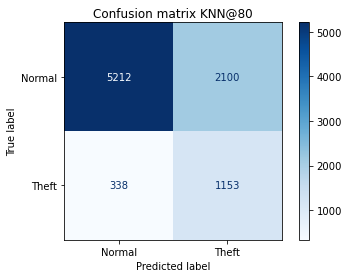

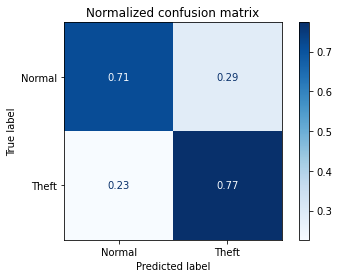

In [25]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix KNN@80",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model,X_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [27]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

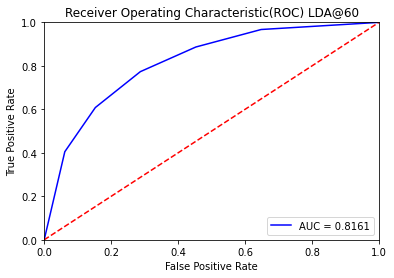

In [28]:
plt.title("Receiver Operating Characteristic(ROC) LDA@60")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [10]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

## old here

In [11]:
grid_knn = GridSearchCV(
estimator=KNeighborsClassifier(),
param_grid={"n_neighbors":[1,2,3,4,5]},
  scoring={"precision": make_scorer(precision_score),
            "recall":make_scorer(recall_score),
            "f1_score":make_scorer(f1_score),
           "roc_auc_score":make_scorer(roc_auc_score)
            },
    refit="roc_auc_score",
    return_train_score=True,
    cv=3,
    verbose=1,
    n_jobs=-1
)

TypeError: __init__() missing 1 required positional argument: 'param_grid'

In [12]:
grid_knn.fit(X,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]}, refit='roc_auc_score',
             return_train_score=True,
             scoring={'f1_score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score),
                      'roc_auc_score': make_scorer(roc_auc_score)},
             verbose=1)

In [14]:
 results = pd.DataFrame(grid_knn.cv_results_)

In [15]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,...,split1_test_roc_auc_score,split2_test_roc_auc_score,mean_test_roc_auc_score,std_test_roc_auc_score,rank_test_roc_auc_score,split0_train_roc_auc_score,split1_train_roc_auc_score,split2_train_roc_auc_score,mean_train_roc_auc_score,std_train_roc_auc_score
0,4.320384,2.647092,148.627137,19.687164,1,{'n_neighbors': 1},0.204487,0.205293,0.218832,0.209537,...,0.566764,0.568551,0.565646,0.002937,1,1.000000,1.000000,1.000000,1.000000,0.000000
1,8.546956,3.995110,145.480098,25.104715,2,{'n_neighbors': 2},0.408867,0.340909,0.434978,0.394918,...,0.530604,0.535500,0.531994,0.002497,4,0.604149,0.613160,0.612322,0.609877,0.004065
2,7.748655,5.011350,133.308594,22.194868,3,{'n_neighbors': 3},0.334091,0.307414,0.345652,0.329052,...,0.555586,0.554328,0.553180,0.002565,2,0.655039,0.661730,0.661776,0.659515,0.003165
3,0.920768,0.070389,98.810476,0.760232,4,{'n_neighbors': 4},0.446541,0.432558,0.480000,0.453033,...,0.533988,0.531483,0.530543,0.003265,5,0.561476,0.568356,0.565064,0.564965,0.002809
4,0.895737,0.038153,97.033249,0.266703,5,{'n_neighbors': 5},0.400000,0.407186,0.400749,0.402645,...,0.548902,0.538301,0.541470,0.005274,3,0.582845,0.589796,0.587859,0.586834,0.002929


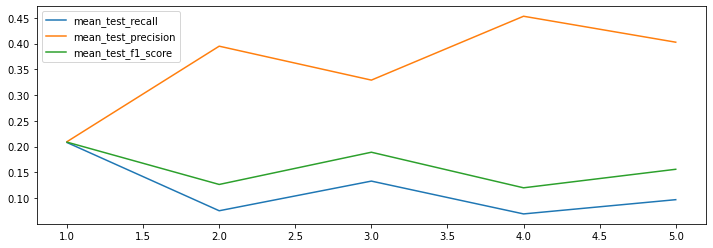

In [16]:
plt.figure(figsize= (12,4))
for score in ["mean_test_recall","mean_test_precision","mean_test_f1_score"]:
    plt.plot([_ for _ in results["param_n_neighbors"]],
            results[score],
            label = score)
plt.legend();